In [93]:
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [94]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Example review.
Note: index paddin, because 0,1,2 - for padding, start and unknown

In [95]:
word_index = imdb.get_word_index()
reward_word_index = {v:k for k,v in word_index.items()}
reward_word_index;

In [96]:
# Example review
" ".join([reward_word_index.get(x-3,'?') for x in  train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [97]:
#Vectorize data
def vectorize_seqence(sequence, dimension = 10000):
    result = np.zeros((len(sequence), dimension))
    for i,sequence in enumerate(sequence):
        result[i,sequence] = 1
    return result
x_train = vectorize_seqence(train_data)
x_test = vectorize_seqence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# add validation set
x_val, partial_x_train =x_train[:10000], x_train[10000:]
y_val, partial_y_train =y_train[:10000], y_train[10000:]

In [168]:
# build model
history1 = []
name1 = 'loss = binary_crossentropy'
for i in range(3):
    model1 = models.Sequential()
    model1.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
    model1.add(layers.Dense(16, activation = 'relu'))
    model1.add(layers.Dense(1, activation = 'sigmoid'))
    model1.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # simulation
    history1.append( model1.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val)))
history2 = []
name2 = 'loss = mse'
for i in range(3):
    model2 = models.Sequential()
    model2.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
    model2.add(layers.Dense(16, activation = 'relu'))
    model2.add(layers.Dense(1, activation = 'sigmoid'))
    model2.compile(optimizer='rmsprop', 
                  loss='mse',
                  metrics=['accuracy'])
    # simulation
    history2.append( model2.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val)))
    
# build model
history3 = []
name3 = 'loss = binary_crossentropy, activat = tanh'
for i in range(3):
    model3 = models.Sequential()
    model3.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
    model3.add(layers.Dense(16, activation = 'tanh'))
    model3.add(layers.Dense(1, activation = 'sigmoid'))
    model3.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # simulation
    history3.append( model3.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val)))    

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.4968 - acc: 0.7943 - val_loss: 0.3635 - val_acc: 0.8769
Epoch 2/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.2868 - acc: 0.9065 - val_loss: 0.2981 - val_acc: 0.8852
Epoch 3/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2079 - acc: 0.9309 - val_loss: 0.2788 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1639 - acc: 0.9476 - val_loss: 0.2767 - val_acc: 0.8898
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1352 - acc: 0.9569 - val_loss: 0.2965 - val_acc: 0.8839
Epoch 6/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1111 - acc: 0.9657 - val_loss: 0.3189 - val_acc: 0.8797
Epoch 7/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0923 - acc: 0.9735 - val_loss: 0.3226 - 

15000/15000 [==============================] - 2s 153us/step - loss: 0.0090 - acc: 0.9993 - val_loss: 0.6092 - val_acc: 0.8677
Epoch 20/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.0087 - acc: 0.9989 - val_loss: 0.6511 - val_acc: 0.8686
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1754 - acc: 0.7867 - val_loss: 0.1248 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0960 - acc: 0.9029 - val_loss: 0.0999 - val_acc: 0.8783
Epoch 3/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.0687 - acc: 0.9279 - val_loss: 0.0870 - val_acc: 0.8887
Epoch 4/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.0533 - acc: 0.9433 - val_loss: 0.0891 - val_acc: 0.8812
Epoch 5/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.0425 - acc: 0.9566 - val_loss: 0.0840 - val_acc: 0

15000/15000 [==============================] - 2s 153us/step - loss: 0.0044 - acc: 0.9969 - val_loss: 0.1052 - val_acc: 0.8702
Epoch 18/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.0036 - acc: 0.9973 - val_loss: 0.1068 - val_acc: 0.8658
Epoch 19/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.0041 - acc: 0.9964 - val_loss: 0.1057 - val_acc: 0.8686
Epoch 20/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.0027 - acc: 0.9977 - val_loss: 0.1065 - val_acc: 0.8690
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.4873 - acc: 0.7993 - val_loss: 0.3660 - val_acc: 0.8671
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2768 - acc: 0.9092 - val_loss: 0.2926 - val_acc: 0.8855
Epoch 3/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1947 - acc: 0.9348 - val_loss: 0.2687 - val_acc:

15000/15000 [==============================] - 2s 157us/step - loss: 0.0041 - acc: 0.9997 - val_loss: 0.6904 - val_acc: 0.8633
Epoch 16/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.0186 - acc: 0.9945 - val_loss: 0.7126 - val_acc: 0.8633
Epoch 17/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.0021 - acc: 0.9998 - val_loss: 0.7424 - val_acc: 0.8622
Epoch 18/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.0017 - acc: 0.9999 - val_loss: 1.0415 - val_acc: 0.8290
Epoch 19/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0090 - acc: 0.9972 - val_loss: 0.8046 - val_acc: 0.8618
Epoch 20/20
15000/15000 [==============================] - 2s 154us/step - loss: 5.1398e-04 - acc: 1.0000 - val_loss: 0.8478 - val_acc: 0.8612


# Plot solution

## plot loss

In [198]:
def plot_history(hist, ax, title, val):
    for h,c in zip(hist,['b','g','r']):
        history_dict = h.history
        loss_value = history_dict[val]
        val_loss_value = history_dict['val_'+val]
        epochs = range(1,len( history_dict['val_'+val])+1) 
        ax.plot(epochs, loss_value,c+'o',label = 'Training '+val)
        ax.plot(epochs, val_loss_value,c,label = 'Validation '+val)
        ax.set_ylim(0.8,1.00)
        ax.set_xlim(0,22.00)
        ax.grid()

    ax.set_title(title)
    ax.legend()
    


<Figure size 432x288 with 0 Axes>

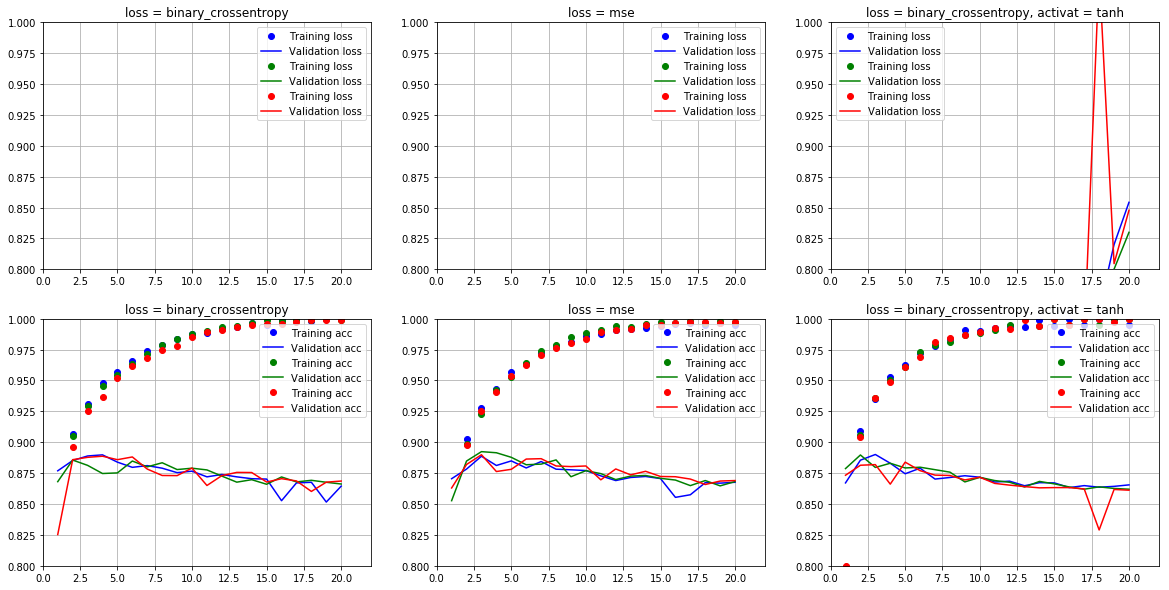

In [199]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 10))
axes = fig.subplots(nrows=2, ncols=3);
#base
plot_history(history1,axes[0,0], name1,'loss')
plot_history(history1,axes[1,0], name1,'acc')
# mse
plot_history(history2,axes[0,1], name2,'loss')
plot_history(history2,axes[1,1], name2,'acc')
# mse
plot_history(history3,axes[0,2], name3,'loss')
plot_history(history3,axes[1,2], name3,'acc')